In [61]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras import layers, models
from kneed import KneeLocator
from sklearn.manifold import TSNE
from keras_tuner import HyperParameters, RandomSearch
from matplotlib.colors import ListedColormap
from keras.optimizers import Adam

#  Preproccesing & Cleaning

In [3]:
# Data Preprocessing and Data Cleaning
adult23 = pd.read_csv('adult23.csv')
adult22 = pd.read_csv('adult22.csv')

# Display dataset sizes
print("Dataset Size (adult23):", adult23.shape)
print("Dataset Size (adult22):", adult22.shape)

# Select categorical and numerical columns
categorical_columns_adult23 = adult23.select_dtypes(include=['object']).columns
numerical_columns_adult23 = adult23.select_dtypes(include=[np.number]).columns
print("\nTotal Categorical Columns in adult23:", len(categorical_columns_adult23))
print("Total Numerical Columns in adult23:", len(numerical_columns_adult23))


Dataset Size (adult23): (29522, 647)
Dataset Size (adult22): (27651, 637)

Total Categorical Columns in adult23: 1
Total Numerical Columns in adult23: 646


In [4]:
# Data Preprocessing and Data Cleaning
adult23 = pd.read_csv('adult23.csv')
adult22 = pd.read_csv('adult22.csv')

missing_threshold = 0.85
adult23 = adult23.dropna(axis=1, thresh=int((1 - missing_threshold) * len(adult23)))
adult22 = adult22.dropna(axis=1, thresh=int((1 - missing_threshold) * len(adult22)))
print(f"Dataset Size after dropping columns with >85% missing values (adult23): {adult23.shape}")
print(f"Dataset Size after dropping columns with >85% missing values (adult22): {adult22.shape}")


Dataset Size after dropping columns with >85% missing values (adult23): (29522, 379)
Dataset Size after dropping columns with >85% missing values (adult22): (27651, 396)


In [5]:
# Select categorical and numerical columns
categorical_columns_adult23 = adult23.select_dtypes(include=['object']).columns
numerical_columns_adult23 = adult23.select_dtypes(include=[np.number]).columns
print("\nTotal Categorical Columns in adult23:", len(categorical_columns_adult23))
print("Total Numerical Columns in adult23:", len(numerical_columns_adult23))
print("Categorical Columns in adult23:", categorical_columns_adult23.tolist())
print("Numerical Columns in adult23:", numerical_columns_adult23.tolist())

categorical_columns_adult22 = adult22.select_dtypes(include=['object']).columns
numerical_columns_adult22 = adult22.select_dtypes(include=[np.number]).columns
print("\nTotal Categorical Columns in adult22:", len(categorical_columns_adult22))
print("Total Numerical Columns in adult22:", len(numerical_columns_adult22))
print("Categorical Columns in adult22:", categorical_columns_adult22.tolist())
print("Numerical Columns in adult22:", numerical_columns_adult22.tolist())



Total Categorical Columns in adult23: 1
Total Numerical Columns in adult23: 378
Categorical Columns in adult23: ['HHX']
Numerical Columns in adult23: ['URBRRL', 'RATCAT_A', 'INCTCFLG_A', 'IMPINCFLG_A', 'LANGHM_A', 'PPSU', 'PSTRAT', 'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A', 'AFNOW', 'YRSINUS_A', 'CITZNSTP_A', 'SPOUSEDUCP_A', 'LEGMSTAT_A', 'MARSTAT_A', 'SASPPRACE_A', 'SASPPHISP_A', 'SPOUSAGETC_A', 'SPOUSWKFT_A', 'SPOUSWRK_A', 'SPOUSESEX_A', 'SHINGYEARP_A', 'HHRESPSA_FLG', 'PCNTADWFP1_A', 'PCNTADWKP1_A', 'FDSCAT4_A', 'FDSCAT3_A', 'EMPDYSMSS3_A', 'EMPLSTWOR1_A', 'EMPWRKFT1_A', 'EMPWRKLSW1_A', 'EMPWKHRS3_A', 'EMDOCCUPN2_A', 'EMDOCCUPN1_A', 'EMDINDSTN2_A', 'EMDINDSTN1_A', 'SMKECIGST_A', 'SMKCIGST_A', 'BMICAT_A', 'WEIGHTLBTC_A', 'HEIGHTTC_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'PCNT18UPTC', 'PCNTLT18TC', 'PHQ2SCREEN_A', 'GAD2SCREEN_A', 'COVER65_A', 'COVER_A', 'EXCHANGE_A', 'NOTCOV_A', 'PLNWRKR1_A', 'MCADVR_A', 'HICOSTR1_A', 'OTHGOV_A', 'OTHPUB_A', 'IHS_A', 'MILITARY_A', 'CHIP_A', 'MEDICAID_A', 'M

In [6]:
# Remove columns with more than 85% missing values
missing_threshold = 0.85
adult23 = adult23.dropna(axis=1, thresh=int((1 - missing_threshold) * len(adult23)))
adult22 = adult22.dropna(axis=1, thresh=int((1 - missing_threshold) * len(adult22)))

# Remove columns containing string values
adult23 = adult23.select_dtypes(exclude=['object'])
adult22 = adult22.select_dtypes(exclude=['object'])

# Align both datasets to have the same columns before imputation
adult23, adult22 = adult23.align(adult22, join='inner', axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
adult23_imputed = pd.DataFrame(imputer.fit_transform(adult23), columns=adult23.columns)
adult22_imputed = pd.DataFrame(imputer.transform(adult22), columns=adult22.columns)

# Display dataset sizes after cleaning
print("\nDataset Size after Cleaning (adult23):", adult23_imputed.shape)
print("Dataset Size after Cleaning (adult22):", adult22_imputed.shape)



Dataset Size after Cleaning (adult23): (29522, 252)
Dataset Size after Cleaning (adult22): (27651, 252)


# Feature Selection 

In [7]:
# Feature Scaling
scaler = StandardScaler()
adult23_scaled = scaler.fit_transform(adult23_imputed)
adult22_scaled = scaler.transform(adult22_imputed)

# PCA for Dimensionality Reduction
pca = PCA()
pca.fit(adult23_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)


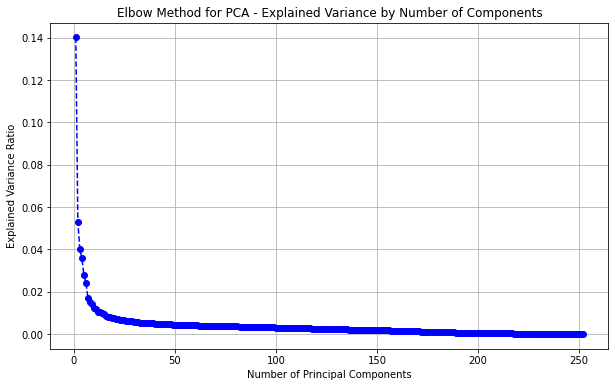

In [14]:
# Plot explained variance using elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method for PCA - Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [15]:
# Determine number of components based on the elbow point
plateau_point = np.argmax(np.diff(cumulative_variance) < 0.01) + 1
print(f'The elbow point where explained variance starts to plateau is around component: {plateau_point}')

# Select components to keep based on the elbow point
pca = PCA(n_components=plateau_point)
adult23_pca = pca.fit_transform(adult23_scaled)
adult22_pca = pca.transform(adult22_scaled)


The elbow point where explained variance starts to plateau is around component: 13


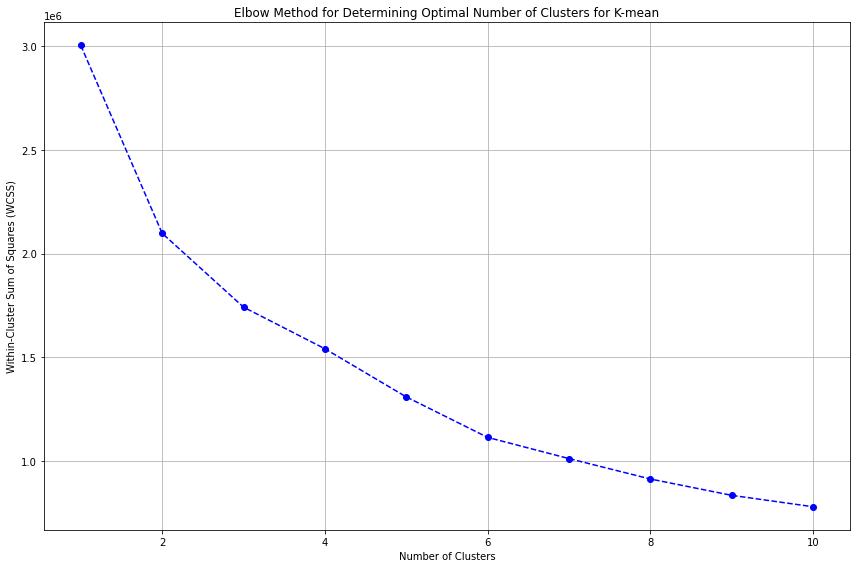

In [47]:
# K-Means Clustering with Elbow Method for Determining Optimal Clusters
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(adult23_pca)
    wcss.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Number of Clusters for K-mean')
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
#Finding optimal number of clusters 
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
n_clusters = kneedle.knee
print(f'The optimal number of clusters is around: {n_clusters}')


The optimal number of clusters is around: 3


# Modeling

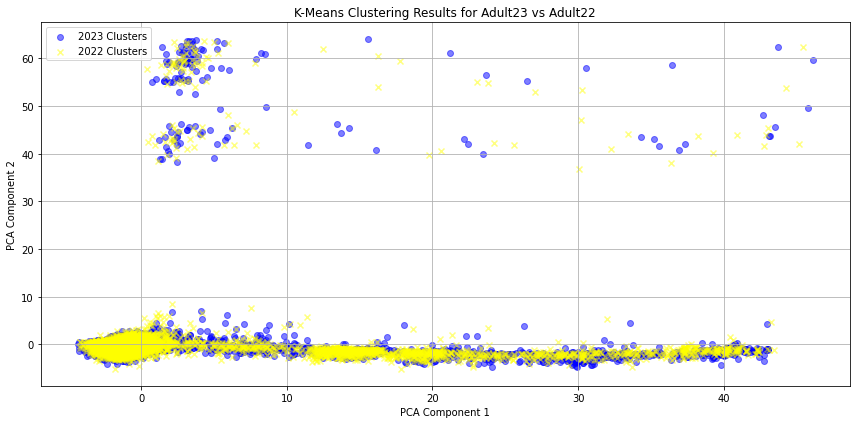

In [57]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=30)
adult23_clusters = kmeans.fit_predict(adult23_pca)
adult22_clusters = kmeans.predict(adult22_pca)

# Create a custom colormap for blue and yellow
custom_cmap = ListedColormap(['blue', 'yellow'])

# Visualize Clustering Results
plt.figure(figsize=(12, 6))

# Plot adult23_clusters in blue
plt.scatter(adult23_pca[:, 0], adult23_pca[:, 1], c='blue', alpha=0.5, label='2023 Clusters', marker='o')

# Plot adult22_clusters in yellow
plt.scatter(adult22_pca[:, 0], adult22_pca[:, 1], c='yellow', alpha=0.5, marker='x', label='2022 Clusters')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results for Adult23 vs Adult22')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# Autoencoder for Feature Reduction
input_dim = adult23_scaled.shape[1]
encoding_dim = 10

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(adult23_scaled, adult23_scaled, epochs=50, batch_size=256, shuffle=True, validation_data=(adult22_scaled, adult22_scaled))

# Extract the encoder part for dimensionality reduction
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)
adult23_encoded = encoder.predict(adult23_scaled)
adult22_encoded = encoder.predict(adult22_scaled)

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1830 - val_loss: 0.9211
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9090 - val_loss: 0.8689
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8827 - val_loss: 0.8561
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8727 - val_loss: 0.8480
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8715 - val_loss: 0.8421
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8458 - val_loss: 0.8376
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8691 - val_loss: 0.8340
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8482 - val_loss: 0.8308
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8599 - val_loss: 0.8283
Epoch 10/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8430 - val_loss: 0.8261
Epoch 11/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8416 - val_loss: 0.8243
Epoch 12/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/var/folders/5h/w8cyshhx6jn77xvy32pblprr0000gn/T/ipykernel_878/4116447767.py:20: UserWarning: You passed a edgecolor/edgecolor

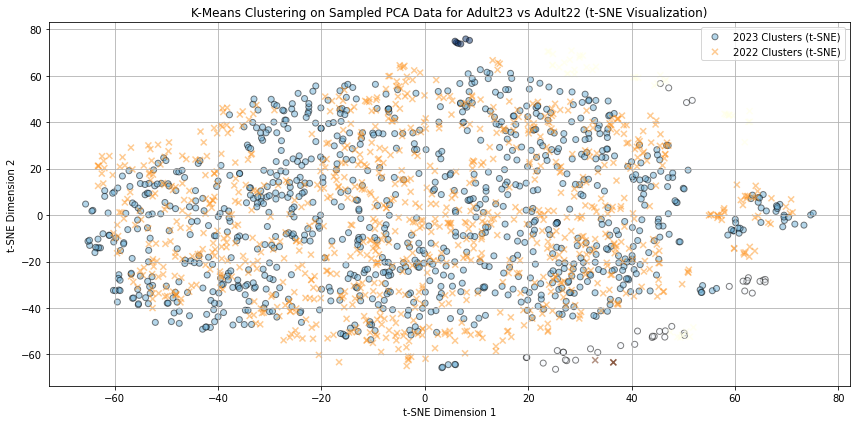

In [48]:
# Apply t-SNE for dimensionality reduction to spread the data more for visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
adult23_tsne = tsne.fit_transform(adult23_pca)
adult22_tsne = tsne.fit_transform(adult22_pca)

# Use separate subsets for each dataset
subset_idx_23 = np.random.choice(range(len(adult23_tsne)), size=1000, replace=False)
subset_idx_22 = np.random.choice(range(len(adult22_tsne)), size=1000, replace=False)

# Visualize Clustering Results After t-SNE
plt.figure(figsize=(12, 6))

# Plot adult23 clusters using t-SNE
plt.scatter(adult23_tsne[subset_idx_23, 0], adult23_tsne[subset_idx_23, 1], 
            c=kmeans.predict(adult23_pca[subset_idx_23]), cmap='Blues', alpha=0.5, label='2023 Clusters (t-SNE)', edgecolors='k')

# Plot adult22 clusters using t-SNE
plt.scatter(adult22_tsne[subset_idx_22, 0], adult22_tsne[subset_idx_22, 1], 
            c=kmeans.predict(adult22_pca[subset_idx_22]), cmap='YlOrBr', alpha=0.5, marker='x', label='2022 Clusters (t-SNE)', edgecolors='k')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('K-Means Clustering on Sampled PCA Data for Adult23 vs Adult22 (t-SNE Visualization)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


INFO:tensorflow:Reloading Oracle from existing project hyperparam_tuning/autoencoder_tuning/oracle.json
Searching for batch size: 64
Searching for batch size: 128
Searching for batch size: 256

The optimal number of units in the encoding layer is 5.
The optimal optimizer is adam.
The optimal batch size is 64.

Epoch 1/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0982 - val_loss: 0.8976
Epoch 2/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9128 - val_loss: 0.8773
Epoch 3/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8934 - val_loss: 0.8680
Epoch 4/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8844 - val_loss: 0.8623
Epoch 5/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8854 - val_loss: 0.8582
Epoch 6/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8856 - val_loss: 0.8546
Epoch 7/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8894 - val_loss: 0.8520
Epoch 8/50
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8751 - val_loss: 0.8498


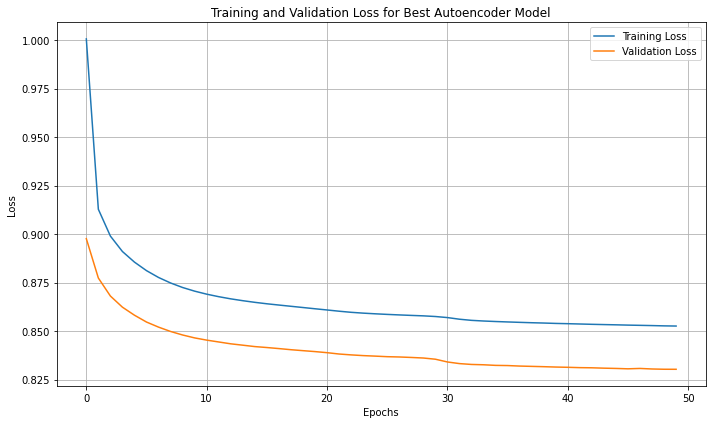

In [36]:
# Tune 1: Basic Hyperparameter Tuning for Autoencoder
def build_autoencoder(hp):
    input_dim = adult23_scaled.shape[1]
    input_layer = layers.Input(shape=(input_dim,))
    
    # Hyperparameter tuning for encoding dimension
    encoding_dim = hp.Int('encoding_dim', min_value=5, max_value=50, step=5)
    encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = models.Model(input_layer, decoded)
    
    # Hyperparameter tuning for optimizer
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    autoencoder.compile(optimizer=optimizer_choice, loss='mean_squared_error')

    return autoencoder

# Create a tuner instance for hyperparameter tuning
tuner = RandomSearch(
    build_autoencoder,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='autoencoder_tuning'
)

# Hyperparameter tuning for batch size using a loop
batch_sizes = [64, 128, 256]

# Manually search for the best hyperparameters, avoiding any checkpoint callback
best_trial_loss = float('inf')
best_hps = None
for batch_size in batch_sizes:
    print(f"Searching for batch size: {batch_size}")

    for trial in range(tuner.oracle.max_trials):
        hp = HyperParameters()
        hp.Fixed("batch_size", batch_size)
        
        # Define the model for this specific trial
        model = build_autoencoder(hp)

        # Fit the model and evaluate
        history = model.fit(
            adult23_scaled, adult23_scaled,
            epochs=50,
            batch_size=batch_size,
            validation_data=(adult22_scaled, adult22_scaled),
            verbose=0  # Use verbose=1 if you want more details during training
        )

        # Get the validation loss for the final epoch
        val_loss = history.history['val_loss'][-1]

        if val_loss < best_trial_loss:
            best_trial_loss = val_loss
            best_hps = hp

# Print the best hyperparameters
print(f"""
The optimal number of units in the encoding layer is {best_hps.get('encoding_dim')}.
The optimal optimizer is {best_hps.get('optimizer')}.
The optimal batch size is {best_hps.get('batch_size')}.
""")

# Train the final model with the best hyperparameters
model = build_autoencoder(best_hps)
history = model.fit(adult23_scaled, adult23_scaled,
                    epochs=50,
                    batch_size=best_hps.get('batch_size'),
                    validation_data=(adult22_scaled, adult22_scaled))

# Plotting Training and Validation Loss for Overfitting/Underfitting Analysis
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Best Autoencoder Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

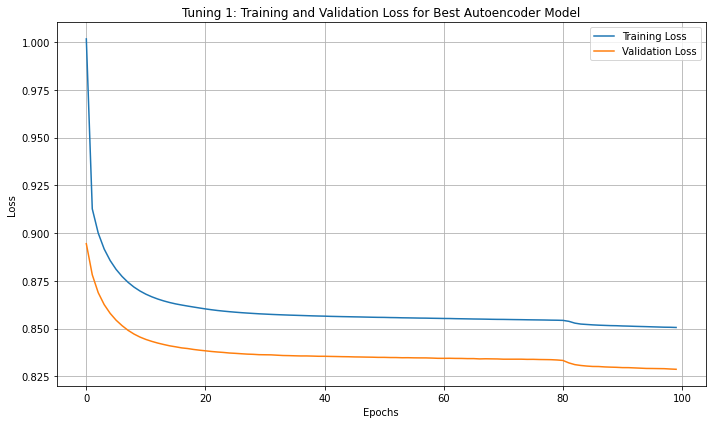

In [59]:
# Plotting Training and Validation Loss for Overfitting/Underfitting Analysis
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Tuning 1: Training and Validation Loss for Best Autoencoder Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Tuned 2: More Detailed Hyperparameter Tuning for Autoencoder
def build_autoencoder(hp):
    input_layer = layers.Input(shape=(input_dim,))
    encoding_dim = hp.Int('encoding_dim', min_value=5, max_value=50, step=5)
    encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)
    autoencoder = models.Model(input_layer, decoded)
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    autoencoder.compile(optimizer=optimizer_choice, loss='mean_squared_error')
    return autoencoder

# Create a tuner instance for hyperparameter tuning
tuner = RandomSearch(
    build_autoencoder,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='autoencoder_tuning'
)

# Hyperparameter tuning for batch size using a loop
batch_sizes = [64, 128, 256]
best_trial_loss = float('inf')
best_hps = None
for batch_size in batch_sizes:
    print(f"Searching for batch size: {batch_size}")
    for trial in range(tuner.oracle.max_trials):
        hp = HyperParameters()
        hp.Fixed("batch_size", batch_size)
        model = build_autoencoder(hp)
        history = model.fit(
            adult23_scaled, adult23_scaled,
            epochs=100,
            batch_size=batch_size,
            validation_data=(adult22_scaled, adult22_scaled),
            verbose=0
        )
        val_loss = history.history['val_loss'][-1]
        if val_loss < best_trial_loss:
            best_trial_loss = val_loss
            best_hps = hp

INFO:tensorflow:Reloading Oracle from existing project hyperparam_tuning/autoencoder_tuning/oracle.json
Searching for batch size: 64
Searching for batch size: 128
Searching for batch size: 256



The optimal number of units in the encoding layer is 5.
The optimal optimizer is adam.
The optimal batch size is 64.

Epoch 1/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.1007 - val_loss: 0.8945
Epoch 2/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9266 - val_loss: 0.8782
Epoch 3/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9051 - val_loss: 0.8688
Epoch 4/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8959 - val_loss: 0.8626
Epoch 5/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8912 - val_loss: 0.8580
Epoch 6/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8773 - val_loss: 0.8544
Epoch 7/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8846 - val_loss: 0.8516
Epoch 8/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8795 - val_loss: 0.8492
Epoch 9/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8648 - val_loss: 0.8472
Epoch 10/100
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8639 - val_loss: 0.8456
Epoch 11/1

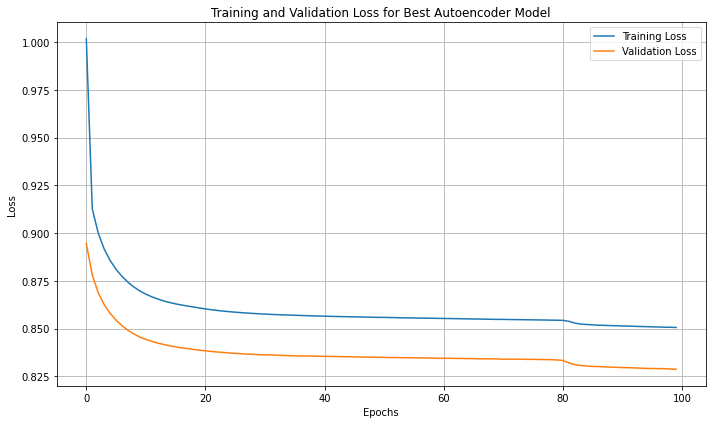

In [38]:
# Print the best hyperparameters
print(f"""
The optimal number of units in the encoding layer is {best_hps.get('encoding_dim')}.
The optimal optimizer is {best_hps.get('optimizer')}.
The optimal batch size is {best_hps.get('batch_size')}.
""")

# Train the final model with the best hyperparameters
model = build_autoencoder(best_hps)
history = model.fit(adult23_scaled, adult23_scaled,
                    epochs=100,
                    batch_size=best_hps.get('batch_size'),
                    validation_data=(adult22_scaled, adult22_scaled))

# Plotting Training and Validation Loss for Overfitting/Underfitting Analysis
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Best Autoencoder Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

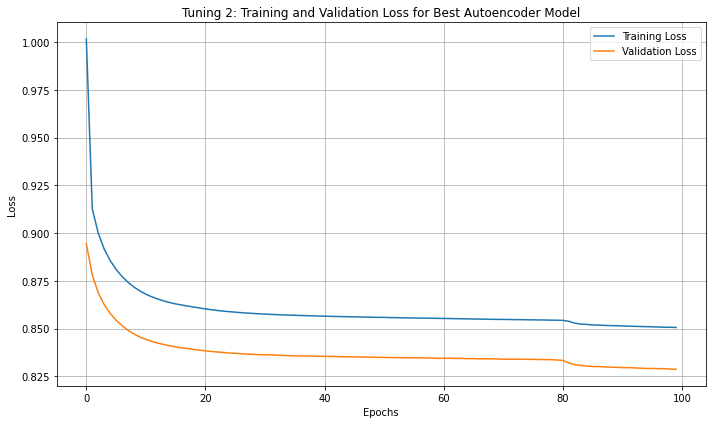

In [58]:
# Plotting Training and Validation Loss for Overfitting/Underfitting Analysis
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Tuning 2: Training and Validation Loss for Best Autoencoder Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Searching for batch size: 64
Searching for batch size: 128
Searching for batch size: 256

The optimal number of units in the encoding layer is 5.
The optimal learning rate is 1e-05.
The optimal batch size is 64.

Epoch 1/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3169 - val_loss: 1.2927
Epoch 2/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3245 - val_loss: 1.2820
Epoch 3/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3178 - val_loss: 1.2721
Epoch 4/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2833 - val_loss: 1.2628
Epoch 5/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3030 - val_loss: 1.2541
Epoch 6/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2639 - val_loss: 1.2460
Epoch 7/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2729 - val_loss: 1.2383
Epoch 8/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2778 - val_loss: 1.2310
Epoch 9/200
462/462 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2618 - val_loss: 1.2241
Epoc

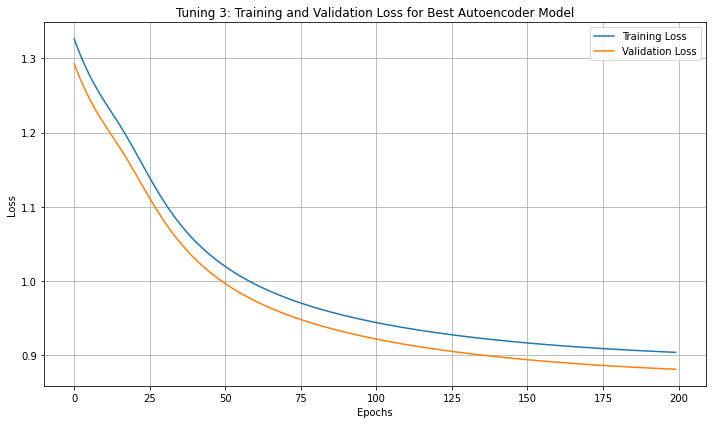

In [62]:
# Tune 3: Advanced Hyperparameter Tuning for Autoencoder

def build_autoencoder(hp):
    input_dim = adult23_scaled.shape[1]
    input_layer = layers.Input(shape=(input_dim,))
    
    # Hyperparameter tuning for encoding dimension
    encoding_dim = hp.Int('encoding_dim', min_value=5, max_value=50, step=5)
    encoded = layers.Dense(encoding_dim, activation='relu', kernel_regularizer='l2')(input_layer)
    decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = models.Model(input_layer, decoded)

    # Hyperparameter tuning for optimizer and learning rate
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')
    optimizer = Adam(learning_rate=learning_rate)
    autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return autoencoder

# Create a tuner instance for hyperparameter tuning
tuner = RandomSearch(
    build_autoencoder,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='autoencoder_tuning_3'
)

# Increase epochs to 200
batch_sizes = [64, 128, 256]

best_trial_loss = float('inf')
best_hps = None
for batch_size in batch_sizes:
    print(f"Searching for batch size: {batch_size}")
    for trial in range(tuner.oracle.max_trials):
        hp = HyperParameters()
        hp.Fixed("batch_size", batch_size)
        model = build_autoencoder(hp)
        history = model.fit(
            adult23_scaled, adult23_scaled,
            epochs=200,
            batch_size=batch_size,
            validation_data=(adult22_scaled, adult22_scaled),
            verbose=0
        )
        val_loss = history.history['val_loss'][-1]
        if val_loss < best_trial_loss:
            best_trial_loss = val_loss
            best_hps = hp

# Print the best hyperparameters
print(f"""
The optimal number of units in the encoding layer is {best_hps.get('encoding_dim')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
The optimal batch size is {best_hps.get('batch_size')}.
""")

# Train the final model with the best hyperparameters
model = build_autoencoder(best_hps)
history = model.fit(adult23_scaled, adult23_scaled,
                    epochs=200,
                    batch_size=best_hps.get('batch_size'),
                    validation_data=(adult22_scaled, adult22_scaled))

# Plotting Training and Validation Loss for Overfitting/Underfitting Analysis
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Tuning 3: Training and Validation Loss for Best Autoencoder Model')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [63]:
# Perform PCA to interpret feature importance
n_components = 13  # Based on earlier elbow analysis
pca = PCA(n_components=n_components)
adult23_pca = pca.fit_transform(adult23_scaled)
explained_variance_ratio = pca.explained_variance_ratio_


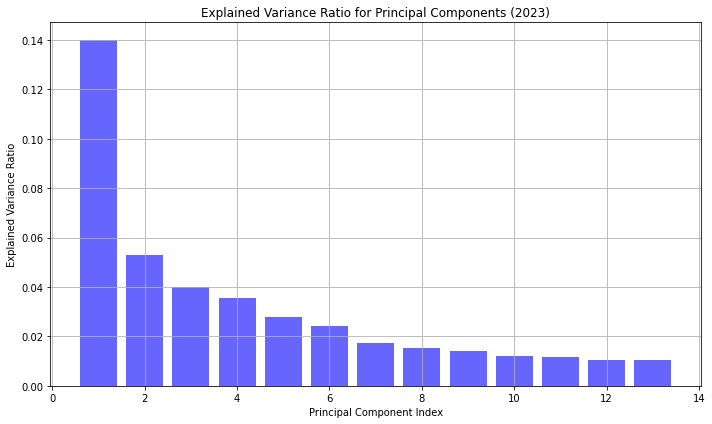

In [64]:
# Plotting Explained Variance Ratio for Each Component
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, color='b', alpha=0.6)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Principal Components (2023)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
# Loading Matrix (Feature Contributions to Each Principal Component)
loading_matrix = pd.DataFrame(pca.components_.T, columns=[f'PC{i + 1}' for i in range(n_components)],
                              index=adult23_imputed.columns)

# Display the top 5 features contributing to each principal component
for i in range(n_components):
    print(f"Top 5 features contributing to PC{i + 1}:")
    sorted_features = loading_matrix.iloc[:, i].abs().sort_values(ascending=False).head(5)
    print(sorted_features)
    print()

Top 5 features contributing to PC1:
SCHCURENR_A    0.155577
CITZNSTP_A     0.155094
AFVET_A        0.154547
NATUSBORN_A    0.154000
ASTATNEW       0.153808
Name: PC1, dtype: float64

Top 5 features contributing to PC2:
HIKIND05_A    0.268612
CHIP_A        0.268465
HIKIND07_A    0.266728
IHS_A         0.266704
OTHGOV_A      0.260651
Name: PC2, dtype: float64

Top 5 features contributing to PC3:
DIFF_A        0.193967
PHSTAT_A      0.165715
DISAB3_A      0.165487
AGEP_A        0.163620
HIKIND01_A    0.157081
Name: PC3, dtype: float64

Top 5 features contributing to PC4:
PLN1PAY4_A    0.285915
PLN1PAY5_A    0.285358
PLN1PAY6_A    0.284845
PLN1PAY3_A    0.283758
PLN1PAY1_A    0.278190
Name: PC4, dtype: float64

Top 5 features contributing to PC5:
MEDDL12M_A    0.230785
MEDNG12M_A    0.229887
RXDG12M_A     0.213898
DENNG12M_A    0.212398
DENDL12M_A    0.211040
Name: PC5, dtype: float64

Top 5 features contributing to PC6:
RATCAT_A       0.195649
POVRATTC_A     0.178880
AGEP_A         0.1642

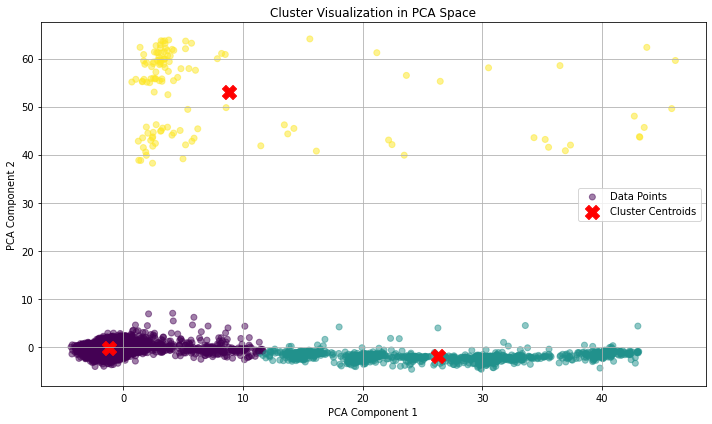

In [73]:
# Visualize cluster centroids in PCA space
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(adult23_pca)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(adult23_pca[:, 0], adult23_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization in PCA Space')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
# Compare cluster characteristics
cluster_df = pd.DataFrame(adult23_scaled, columns=adult23_imputed.columns)
cluster_df['Cluster'] = kmeans.labels_

# Descriptive statistics for each cluster
for cluster in range(2):
    print(f"Cluster {cluster} Descriptive Statistics:")
    print(cluster_df[cluster_df['Cluster'] == cluster].describe().T[['mean', 'std']].head(10))  # Displaying top 10 features
    print()

Cluster 0 Descriptive Statistics:
                 mean       std
URBRRL       0.009861  1.000296
RATCAT_A     0.006917  0.996314
INCTCFLG_A  -0.000119  0.999745
IMPINCFLG_A -0.040521  1.002387
PPSU        -0.001174  0.999401
PSTRAT      -0.002403  0.999203
HISPALLP_A  -0.005616  0.994075
RACEALLP_A  -0.009878  0.990479
DISAB3_A    -0.001286  1.002101
AFNOW       -0.002431  0.914006

Cluster 1 Descriptive Statistics:
                 mean       std
URBRRL      -0.223506  0.969632
RATCAT_A    -0.128952  1.068272
INCTCFLG_A   0.016321  1.037064
IMPINCFLG_A  0.869974  0.161787
PPSU         0.045075  1.021620
PSTRAT       0.069578  1.015839
HISPALLP_A   0.126478  1.125585
RACEALLP_A   0.202965  1.152267
DISAB3_A     0.045116  0.930093
AFNOW        0.057993  2.209877



In [71]:
# Silhouette Score for K-Means
silhouette_avg = silhouette_score(adult23_pca, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.719674283325468


In [69]:
# Determine feature importance from the autoencoder (weights analysis)
# Assuming 'encoder' is the encoder model from the trained autoencoder
encoder_weights = encoder.get_weights()[0]  # Get weights of the first (input) layer
feature_weights = pd.DataFrame(encoder_weights, index=adult23_imputed.columns)

# Calculate average absolute weight across encoding dimensions to determine feature importance
feature_importance = feature_weights.abs().mean(axis=1).sort_values(ascending=False)


Top 10 most important features according to the autoencoder:
SCHCURENR_A    1.083439
CHIP_A         1.021586
FDSCAT4_A      0.983449
FDSCAT3_A      0.931725
HIKIND05_A     0.897869
AFVET_A        0.858772
ASTATNEW       0.832074
HOMEHC12M_A    0.813947
PRIVATE_A      0.733629
TRANSPOR_A     0.713323
dtype: float32


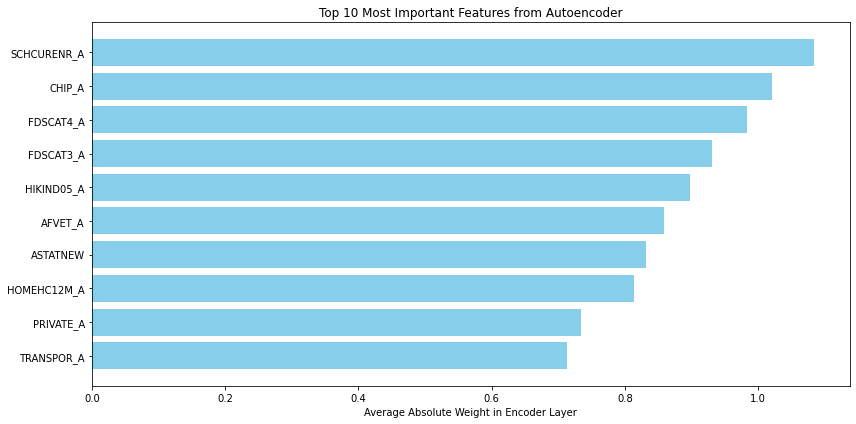

In [70]:
# Display top 10 most important features
print("Top 10 most important features according to the autoencoder:")
print(feature_importance.head(10))

# Visualize the top features from the autoencoder
plt.figure(figsize=(12, 6))
plt.barh(feature_importance.head(10).index, feature_importance.head(10).values, color='skyblue')
plt.xlabel('Average Absolute Weight in Encoder Layer')
plt.title('Top 10 Most Important Features from Autoencoder')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()